# 🧾 About Dataset: 


        Loan_ID: Unique identifier for the loan application

        Gender: Gender of the applicant (Male/Female)

        Married: Marital status of the applicant (Yes/No)

        Education: Educational qualification of the applicant (Graduate/Not Graduate)

        Self_Employed: Whether the applicant is self-employed (Yes/No)

        ApplicantIncome: Monthly income of the applicant

        CoapplicantIncome: Monthly income of the co-applicant (if any)

        LoanAmount: Loan amount requested (in thousands)

        Loan_Amount_Term: Term of the loan (in months)
    
        Credit_History: Whether the applicant has a credit history (1 = Yes, 0 = No)

        Property_Area: Type of area where the applicant lives (Urban/Semiurban/Rural)

        Loan_Status: Whether the loan was approved (Y = Yes, N = No)

    

## 📚 Importing Libraries


In [80]:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
import math
from sklearn.preprocessing import RobustScaler


from rich import print
warnings.filterwarnings("ignore")

# 🛠️ Data PreProcessing

## 📂 Load the data

In [81]:
df = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")



print("[green]Data loaded successfully...[green]")

Data loaded successfully...

## 📊 Display random columns

In [82]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
49,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
260,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
457,LP002467,Male,Yes,0,Graduate,No,3708,2569.0,173.0,360.0,1.0,Urban,N
401,LP002296,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,Rural,N


In [83]:
df = df.drop(columns="Loan_ID",axis=1)

## 🔢 Number of rows and columns

In [84]:
print("the number of rows:",df.shape[0])
print("the number of columns:",df.shape[1])


the number of rows: 614

the number of columns: 12

## 🔍 Some statistical measures

In [85]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [86]:
df.describe(include=object)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [87]:
numerical_columns = df.select_dtypes("number")

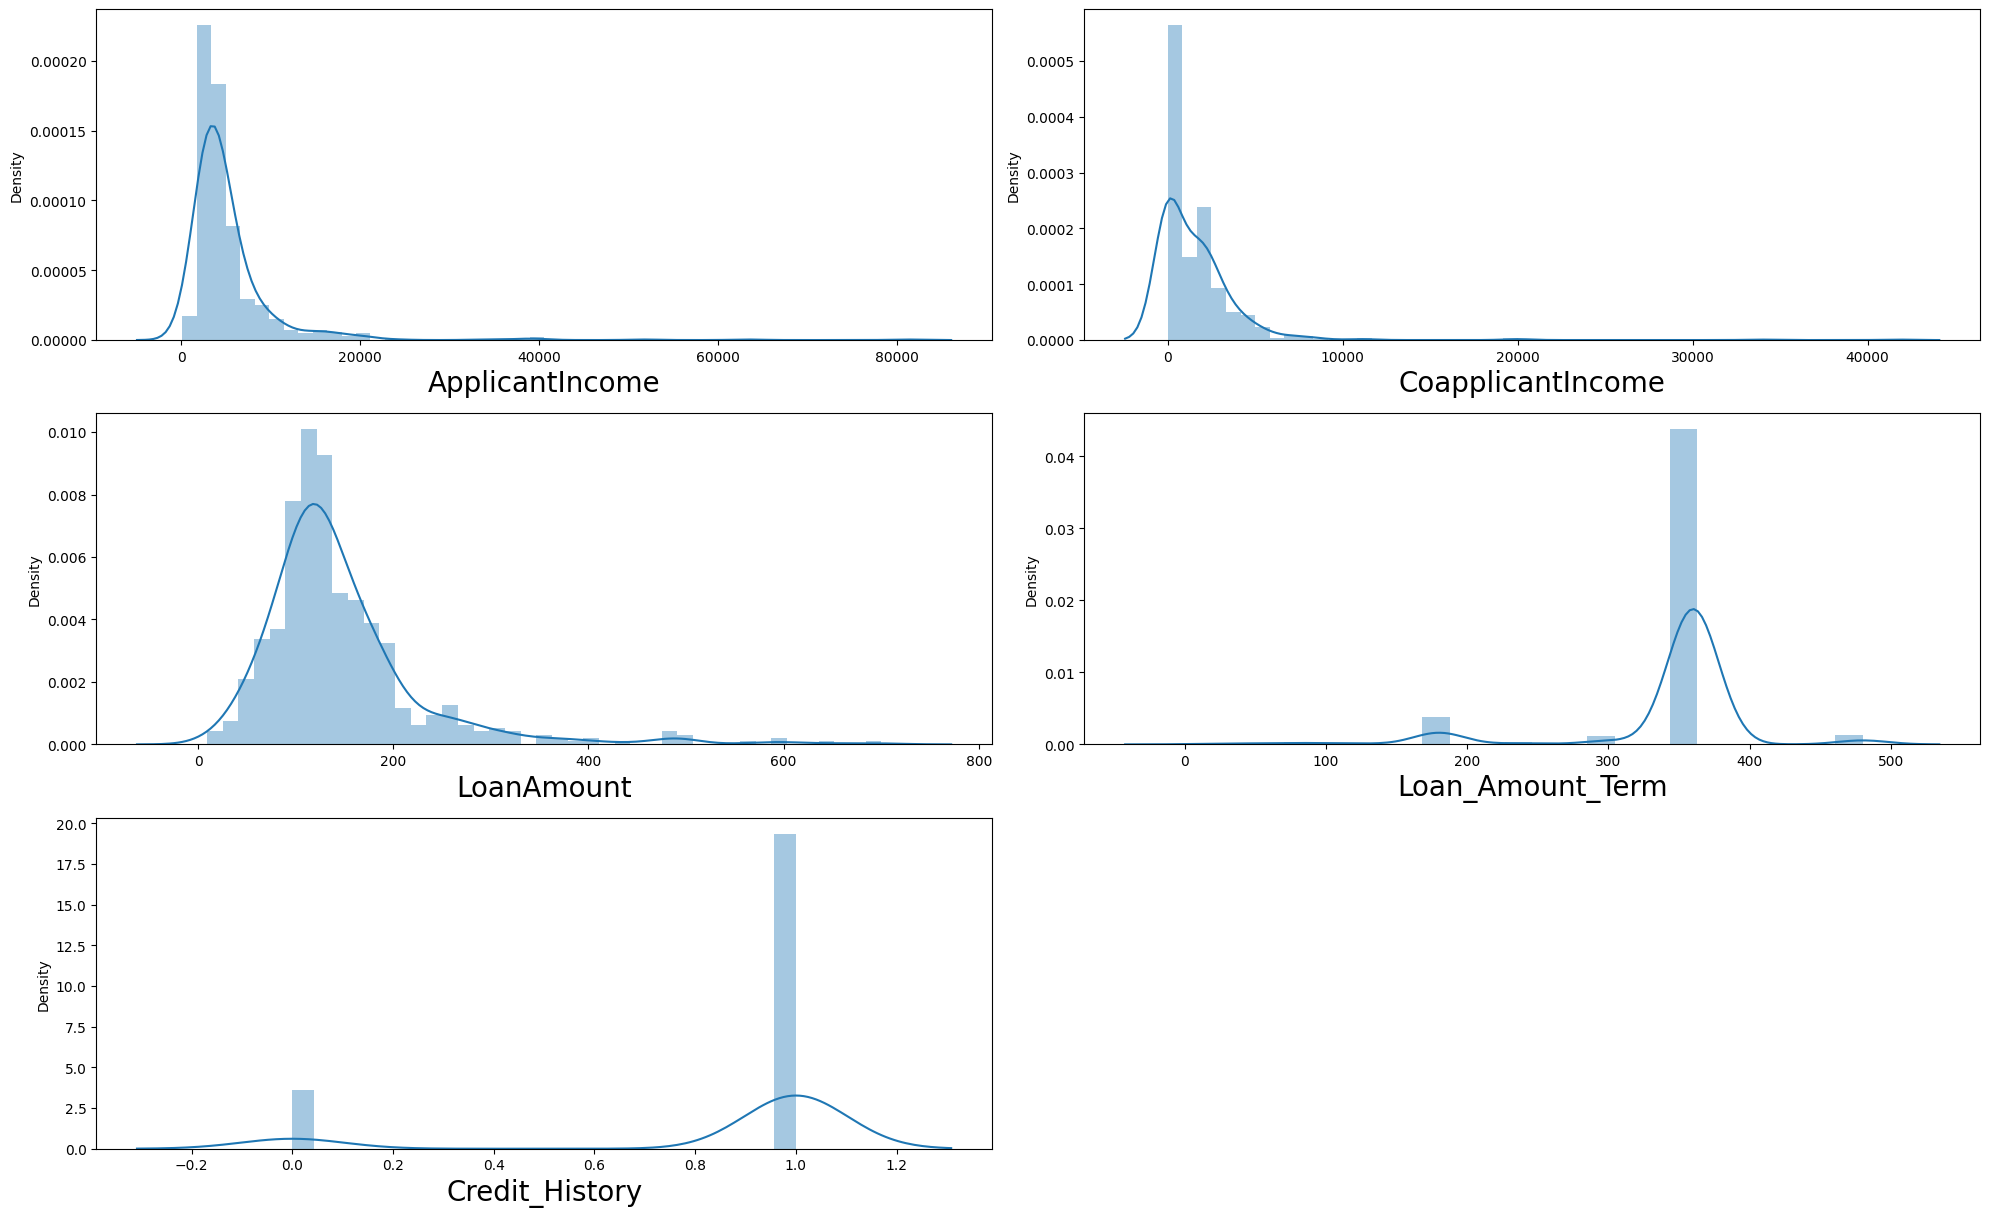

In [88]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in numerical_columns:
    if plotnum <= len(numerical_columns.columns) :
        ax=plt.subplot(10,2,plotnum)
        sns.distplot(numerical_columns[columns])
        plt.xlabel(columns,fontsize=20)
    plotnum += 1
plt.tight_layout() 
plt.show()

In [89]:
catigorical_columns=df.select_dtypes("object")

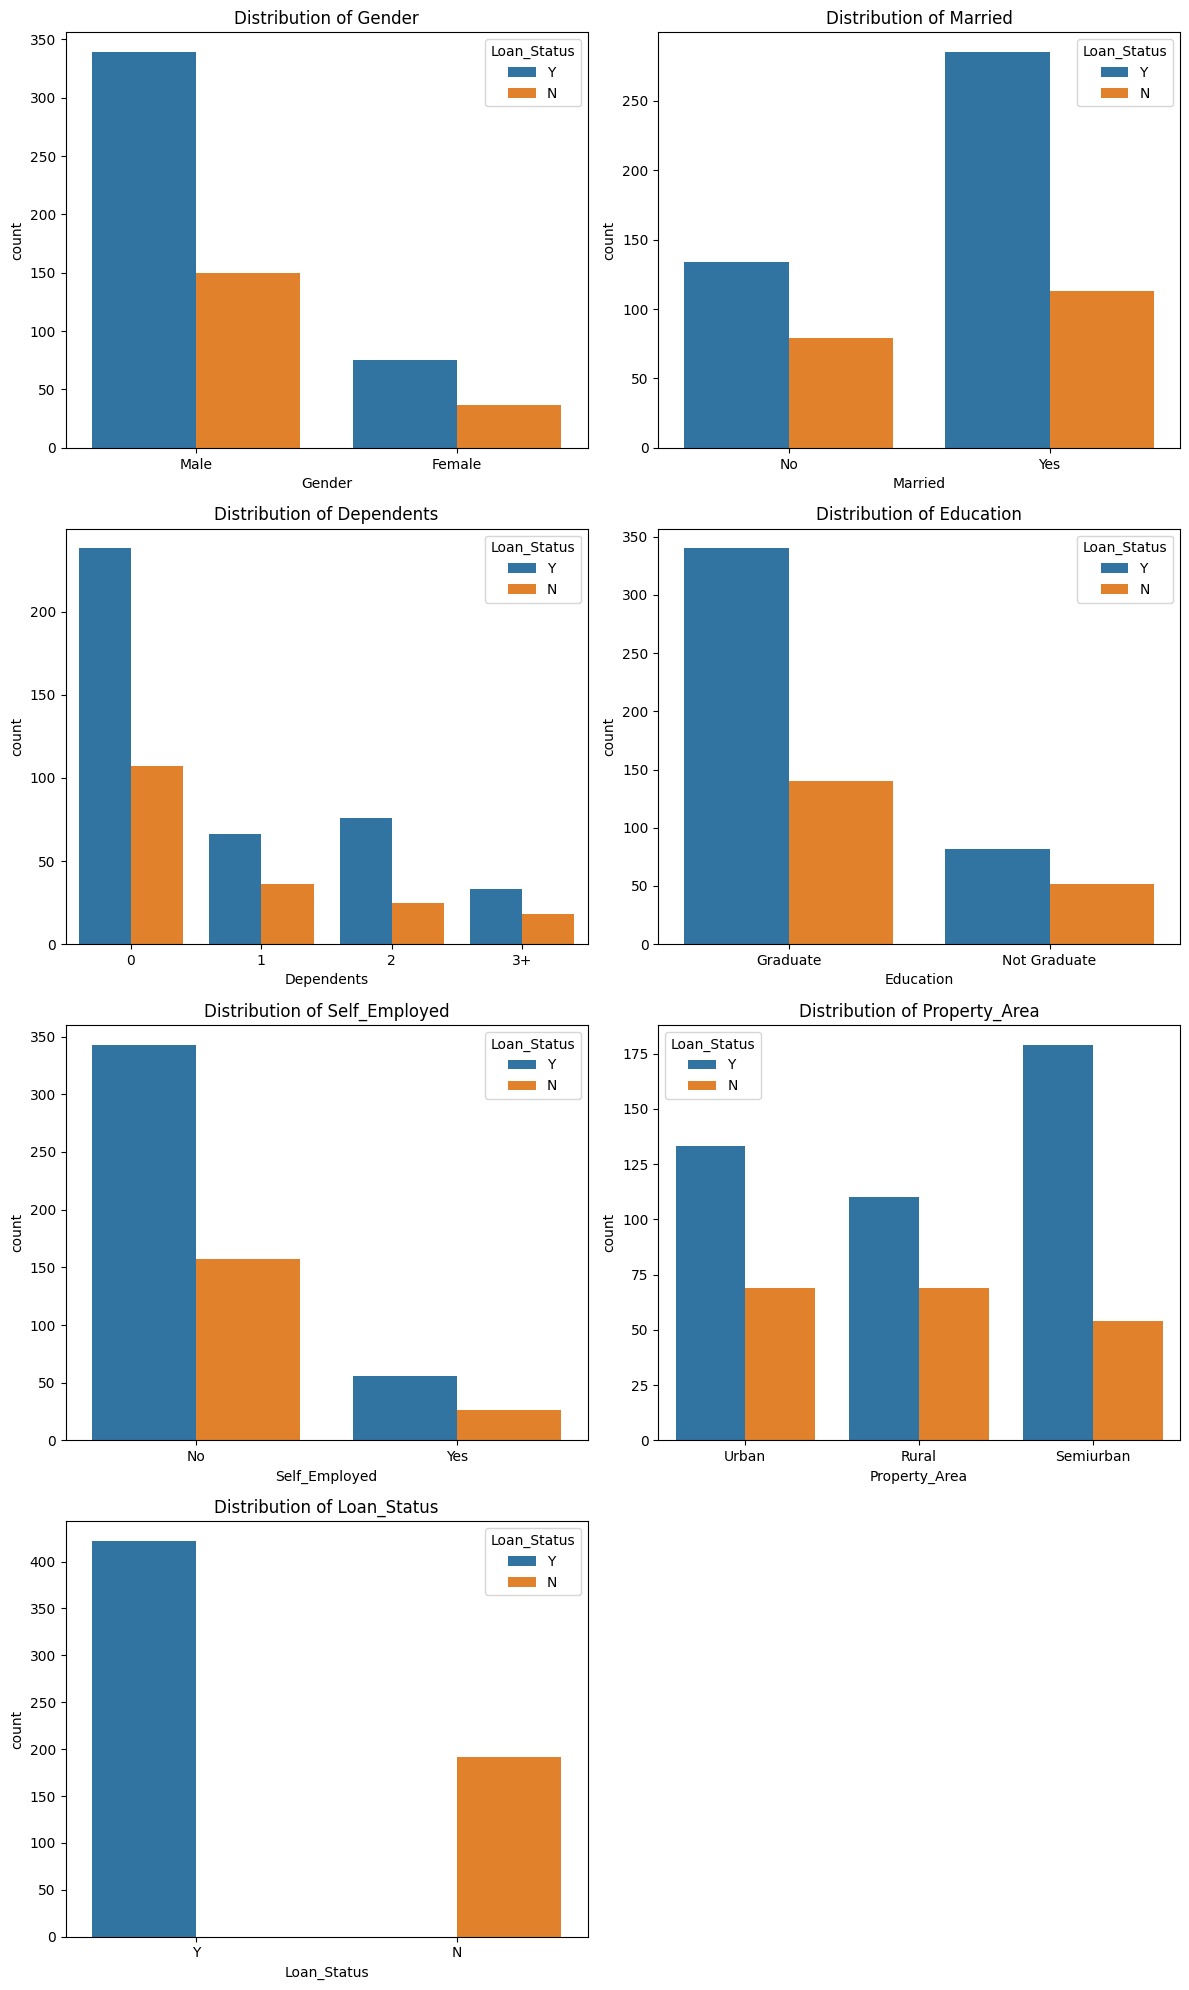

In [90]:
max_plots = catigorical_columns.shape[1]
limited_cols = catigorical_columns[:max_plots]

rows = math.ceil(len(limited_cols) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(limited_cols):
    sns.countplot(x=col, data=df, hue='Loan_Status', ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].tick_params(axis="x", rotation=0)

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

<Axes: >

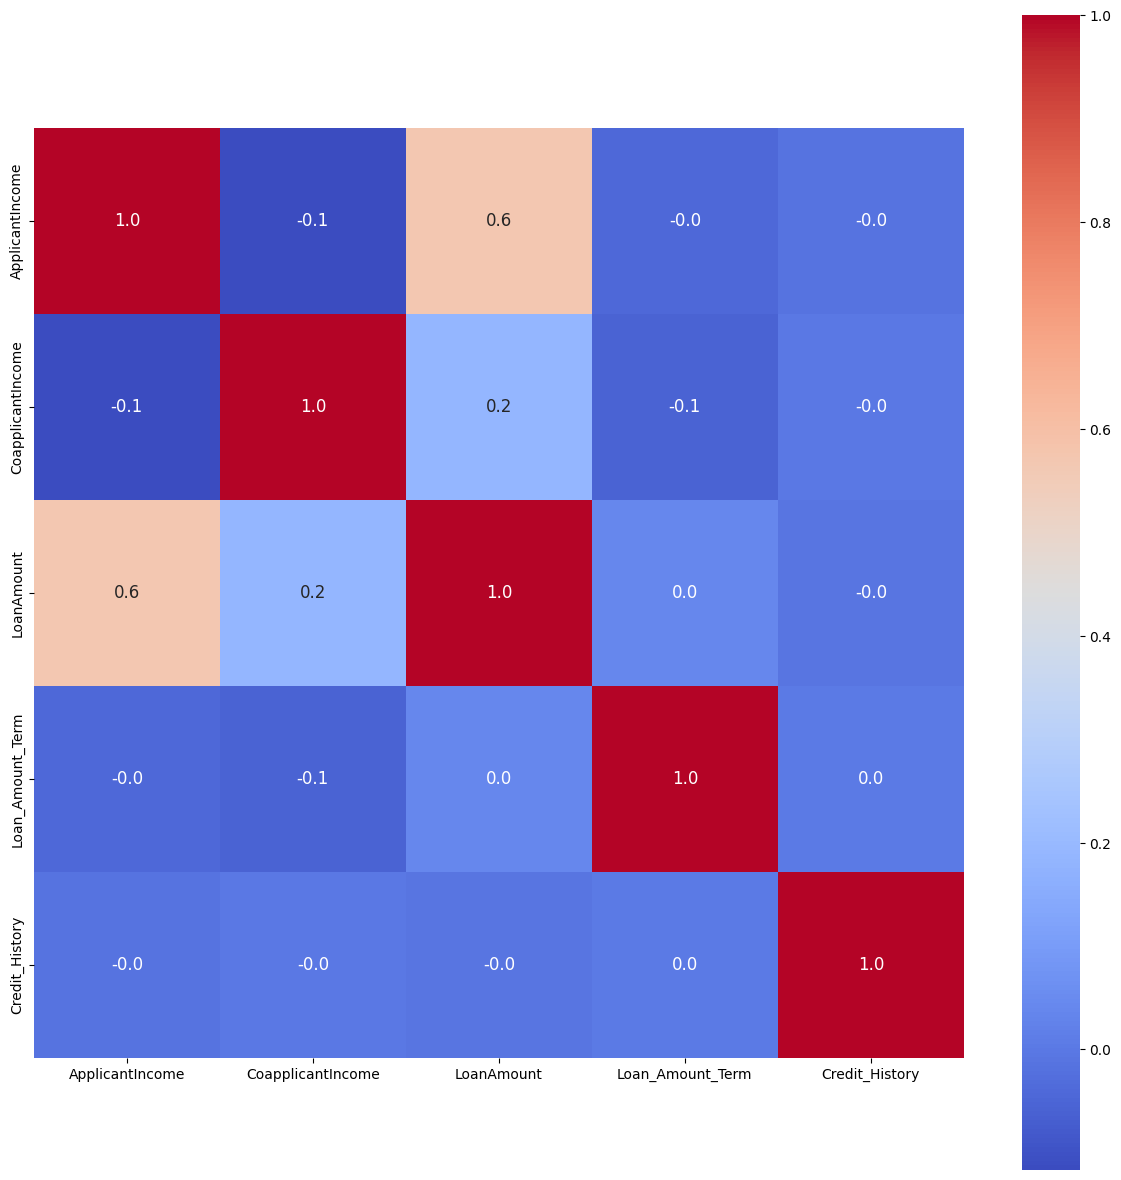

In [91]:
corr=numerical_columns.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':12},cmap='coolwarm')

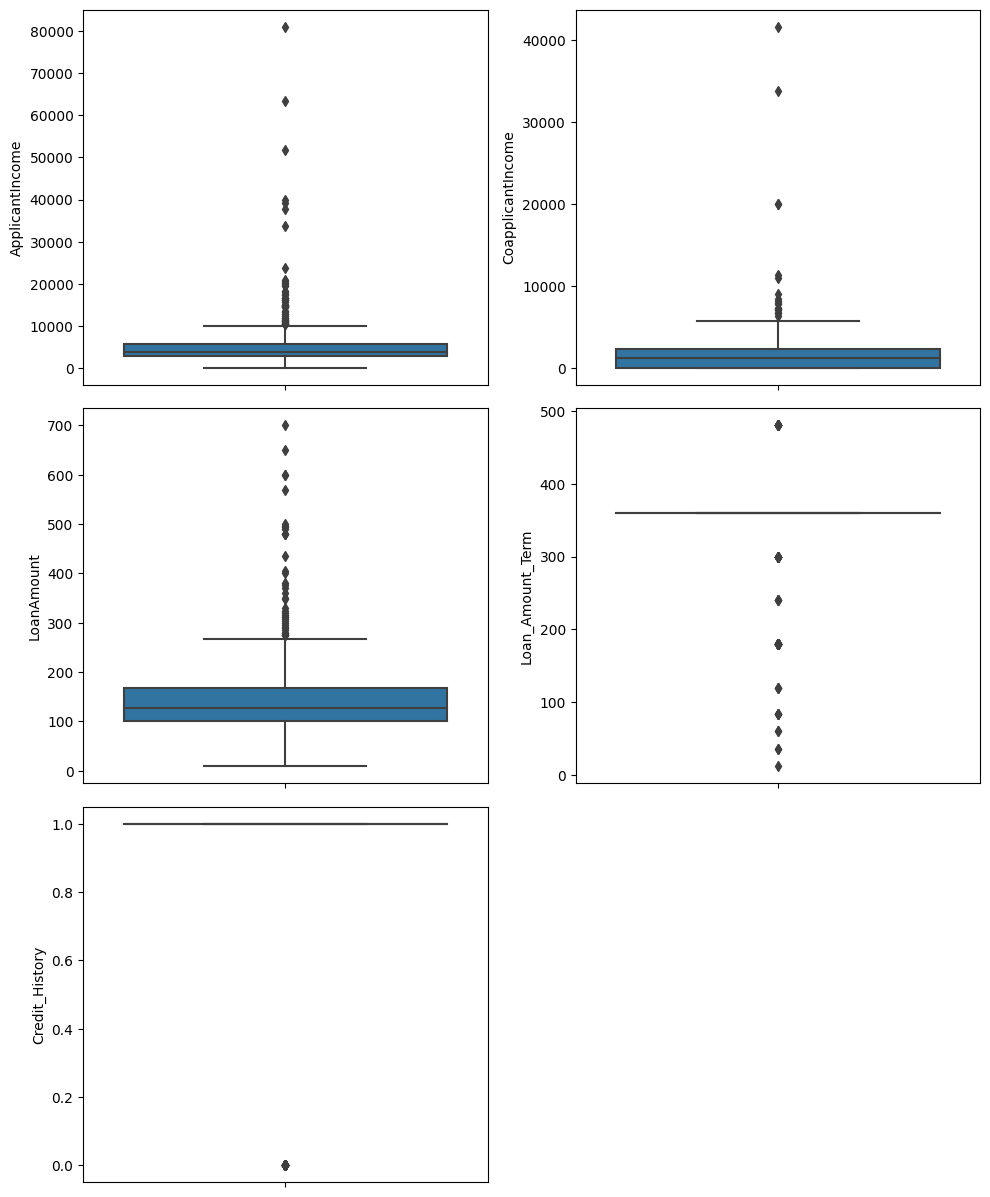

In [92]:
plt.figure(figsize=(10,20))
plotnum = 1
for columns in numerical_columns:
    if plotnum <= len(numerical_columns.columns) :
        ax=plt.subplot(5,2,plotnum)
        sns.boxplot(y=numerical_columns[columns])
       
    plotnum += 1
plt.tight_layout() 
plt.show()

In [93]:
for col in catigorical_columns.columns:
    catigorical_columns[col].value_counts()

for col in catigorical_columns.columns:
    print(f"\nValue counts for column: {col}")
    print(catigorical_columns[col].value_counts())
    print()
    print()

Value counts for column: Gender

Gender
Male      489
Female    112
Name: count, dtype: int64

Value counts for column: Married

Married
Yes    398
No     213
Name: count, dtype: int64

Value counts for column: Dependents

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Value counts for column: Education

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Value counts for column: Self_Employed

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Value counts for column: Property_Area

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Value counts for column: Loan_Status

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [94]:
numerical_columns.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [95]:
numerical_columns.kurt()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

### `we cann't fill with mean cause it's sensetive to outliers` 

## 📄 information about Dataset

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## 🧹 Null & NAN & Duplicated 

In [97]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  149

The Number of NAN in DataFrame is:  149

The Number of duplicated in DataFrame is:  0

In [98]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### `we need to handel this null values` 

In [99]:
df.fillna(df.mode().iloc[0], inplace=True)

In [100]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  0

The Number of NAN in DataFrame is:  0

The Number of duplicated in DataFrame is:  0

# ⚙️ Prepare Data for models

## 🧮 Label Encoder

In [101]:
encoder = LabelEncoder()
for i in catigorical_columns:
    df[i] = encoder.fit_transform(df[i])

## ✂️ Separating the data

In [102]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values 

## 📐 Standarized Data

In [103]:
scaler = RobustScaler()

X = scaler.fit_transform(X) 

## 🔀 Splitting the data into train and test 

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=11,stratify=Y)

In [105]:
print("X shape:", X.shape)
print("y shape:", Y.shape)
print()
print()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print()
print()
print("X_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X shape:
(614, 11)

y shape:
(614,)

X_train shape:
(491, 11)

X_test shape:
(123, 11)

X_train shape:
(491,)

Y_test shape:
(123,)

# 🤖 Train Model 

In [106]:
results=[]
def training_models(model_name, model):
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training and test data
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    
    # Accuracy scores
    accuracy_train = accuracy_score(Y_train, X_train_pred)
    accuracy_test = accuracy_score(Y_test, X_test_pred)
    
    # Classification report
    report = classification_report(Y_test, X_test_pred)
    
    # Print results with formatting
    print(f"[bold cyan]The Accuracy Score of training by {model_name} (Train):[/bold cyan] {accuracy_train:.2f}")
    print(f"[bold magenta]The Accuracy Score of training by {model_name} (Test):[/bold magenta] {accuracy_test:.2f}\n")
    
    print("[bold yellow]Classification Report:[/bold yellow]")
    print(report)
    
    # Completion message
    print("[bold green]Training Complete...[/bold green]")


    
    # Save results
    results.append({
        "Model": model_name,
        "Test Accuracy": accuracy_test
    })
    

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier           
from sklearn.naive_bayes import GaussianNB                     
from xgboost import XGBClassifier

In [108]:
log = LogisticRegression()

training_models("Logistic Regression",log)

The Accuracy Score of training by Logistic Regression (Train): 0.80

The Accuracy Score of training by Logistic Regression (Test): 0.85

Classification Report:

precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

Training Complete...

In [109]:
dest=DecisionTreeClassifier()
training_models("Decision Tree Classifier",dest)

The Accuracy Score of training by Decision Tree Classifier (Train): 1.00

The Accuracy Score of training by Decision Tree Classifier (Test): 0.74

Classification Report:

precision    recall  f1-score   support

           0       0.57      0.61      0.59        38
           1       0.82      0.80      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.74      0.74      0.74       123

Training Complete...

In [110]:
randf = RandomForestClassifier()
training_models("Random Forest Classifier",randf)

The Accuracy Score of training by Random Forest Classifier (Train): 1.00

The Accuracy Score of training by Random Forest Classifier (Test): 0.84

Classification Report:

precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.83      0.96      0.89        85

    accuracy                           0.84       123
   macro avg       0.85      0.76      0.78       123
weighted avg       0.84      0.84      0.83       123

Training Complete...

In [111]:
SVC = SVC()
training_models("SVC",SVC)

The Accuracy Score of training by SVC (Train): 0.69

The Accuracy Score of training by SVC (Test): 0.70

Classification Report:

precision    recall  f1-score   support

           0       1.00      0.03      0.05        38
           1       0.70      1.00      0.82        85

    accuracy                           0.70       123
   macro avg       0.85      0.51      0.44       123
weighted avg       0.79      0.70      0.58       123

Training Complete...

In [112]:
knn = KNeighborsClassifier()
training_models("KNeighbors Classifier",knn)

The Accuracy Score of training by KNeighbors Classifier (Train): 0.80

The Accuracy Score of training by KNeighbors Classifier (Test): 0.77

Classification Report:

precision    recall  f1-score   support

           0       0.75      0.39      0.52        38
           1       0.78      0.94      0.85        85

    accuracy                           0.77       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.77      0.77      0.75       123

Training Complete...

In [113]:
guss = GaussianNB()
training_models("GaussianNB",guss)

The Accuracy Score of training by GaussianNB (Train): 0.79

The Accuracy Score of training by GaussianNB (Test): 0.82

Classification Report:

precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123

Training Complete...

In [114]:
xgb = XGBClassifier()
training_models("XGB Classifier",xgb)

The Accuracy Score of training by XGB Classifier (Train): 1.00

The Accuracy Score of training by XGB Classifier (Test): 0.83

Classification Report:

precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123

Training Complete...

In [115]:
results_df = pd.DataFrame(results)
print("[bold green]Model Comparison Table:[/bold green]")
print(results_df.sort_values(by="Test Accuracy", ascending = False))

Model Comparison Table:

Model  Test Accuracy
0       Logistic Regression       0.853659
2  Random Forest Classifier       0.837398
6            XGB Classifier       0.829268
5                GaussianNB       0.821138
4     KNeighbors Classifier       0.772358
1  Decision Tree Classifier       0.739837
3                       SVC       0.699187

# 🎉 Thank You

# Made by : Ali Osama ✍️

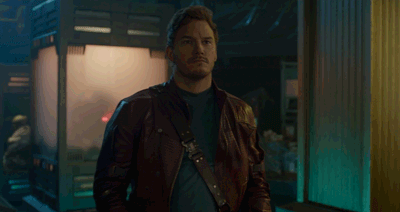